In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)

import seaborn as sns
import matplotlib.pyplot as plt

from utils.data_visualization import subplot_generator

<H1 style="text-align: center;"> Maximizing Recall in Breast Cancer Detection </H1>

The aim of this notebook is to perform a ***classification*** exercise. 

Specifically, we will aim at maximizing the *recall* in a imbalanced dataset, where False Negatives carry a much greater penalty than False Positives.  

The major data science concepts touched upon in this notebook will be:

+ Classification;
+ Imbalanced Dataset; 
+ Accuracy Paradox
+ Data Visualization;
+ Outlier Detection;
+ Nested Cross-Validation.


## About the Dataset

The Breast Cancer dataset can be found <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29">here</a>, in the the UCI Machine Learning repository maintained by the University of California, Irvine.

The dataset contains 569 samples of malignant and benign tumor cells.

The first two columns in the dataset store the unique ID numbers of the samples and the corresponding diagnosis (M=malignant, B=benign), respectively.

The columns 3-32 contain 30 real-value features that have been computed from digitized images of the cell nuclei, which can be used to build a model to predict whether a tumor is benign or malignant.

+ M = Malignant (Cancerous)
+ B = Benign (Not Cancerous)


Ten real-valued features are computed for each cell nucleus:

+ radius (mean of distances from center to points on the perimeter)
+ texture (standard deviation of gray-scale values)
+ perimeter
+ area
+ smoothness (local variation in radius lengths)
+ compactness ($\frac{perimeter^2}{area - 1})$
+ concavity (severity of concave portions of the contour)
+ concave points (number of concave portions of the contour)
+ symmetry
+ fractal dimension $(coastline\_approximation - 1)$



The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.

## Exploratory Data Analysis (EDA)

### Introductory Details

In [2]:
# read the csv file
df = pd.read_csv('../data/breast-cancer.csv')

As usual in data science, we start by taking a quick glance at the dataset composition.

In [3]:
# print the number of rows and the number of columns
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 569 rows and 32 columns.


In [5]:
# exhibit the first ten observations
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# exhibit the bottom ten observations
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


All variables - except *diagnosis* - appear to be numerical, and this is further confirmed by the specific inspection of their type. 

In [7]:
# show the data types
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

### Data Cleaning

#### Missing Values

A relevant aspect to assess during the data cleaning is whether or not the dataset features *NaNs*, that is, missing values for some observations.

The handling of missing data is very important during the preprocessing of the dataset as basically almost all machine learning algorithms do not handle automatically missing values.

In [9]:
# count the number of missing values
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Luckily, no data is missing.

Another step during this phase is to check whether some observations have been reported twice, or more. Obviously, not always duplicates correspond to mistakes. In some cases, duplicates are simply real data that coincidentally exhibit values that are identical. Some carefulness is indeed required.

Nonetheless, if data duplicates are stemming from an error, they do not help our model: they make more computationally costly to train models and may give the duplicate observations more weight than what is correct.

In [3]:
# count the number of duplicate rows
df.duplicated().sum()

0

Another positive news, since no duplicate rows have been found. 

Finally, before moving onto the descriptive statistics, the column *id* will be dropped, as it does not add any predictive power from a logical perspective.

In [3]:
# drop the id column
df.drop(columns='id', inplace=True)

### Descriptive Statistics

#### Target Variable

We begin by achieving a better understanding of our target variable - *diagnosis* - by counting the occurences per class and plotting the results to enhance the power of numbers. 

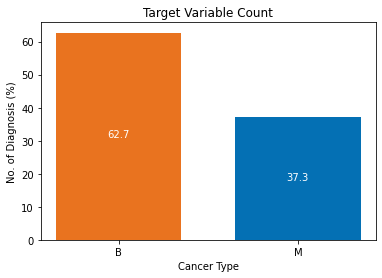

The benign cancers represent 62.7% of the cases
The malignant cancers represent 37.3% of the cases



In [4]:
labels = df['diagnosis'].value_counts().index.tolist()
values = np.round((df['diagnosis'].value_counts(normalize=True)*100), 1).to_list()

# creating the bar plot
plt.bar(labels, 
        values, 
        color = ['#e9731f', '#0470b4'],
        width = 0.7)

plt.xlabel("Cancer Type")
plt.ylabel("No. of Diagnosis (%)")
plt.title("Target Variable Count")

# add the value on each bar
for i in range(len(values)):
        plt.text(i, values[i]//2, values[i], ha='center', color='white')

plt.show()

print(f'The benign cancers represent {values[0]}% of the cases')
print(f'The malignant cancers represent {values[1]}% of the cases')
print()

The dataset is clearly *imbalanced*. Naively, we could take the classification accuracy of about 63% to be our starting point. In other words, if a model did not beat this accuracy threshold, then we would be better off simply predicting that *all* patients do *not* suffer from a malignant cancer.

However, when there is a large class imbalance, even if the classifier always predicted the instances to belong to the majority class - thereby achieving a high classification accuracy - the classifier would be worthless: this is the so-called *Accuracy Paradox*. 



In fact, in problem domains like the current, evaluating a classifier based on its accuracy would be misleading: if the model was used alone for decision support to inform doctors, it would send home 210 women incorrectly thinking their breast cancer is benign (False Negatives).

Rather, additional measures other than accuracy are required. For example, in this case we would focus on *recall*, that is, the proportion of actual malignant cancers that was correctly identified. We strive to eliminate False Negatives, and to achieve so, we are willing to bear a larger number of False Positives (a cancer is diagnosed as malignant even though is actually benign).

Translated into concrete actions, it is preferable to run extra tests on healthy women - despite this would incur additional costs for the healthcare system - rather than saving money but having to suffer some casualties due to undetected malignant cancers.

#### Independent Variables

Next, we will exhibit the descriptive statistics of our continuous variables.

In [22]:
# exhibit some basic descriptive statistics
df.describe().round(4)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.0000,569.0000,569.000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000
mean,14.1273,19.2896,91.969,654.8891,0.0964,0.1043,0.0888,0.0489,0.1812,0.0628,0.4052,1.2169,2.8661,40.3371,0.0070,0.0255,0.0319,0.0118,0.0205,0.0038,16.2692,25.6772,107.2612,880.5831,0.1324,0.2543,0.2722,0.1146,0.2901,0.0839
std,3.5240,4.3010,24.299,351.9141,0.0141,0.0528,0.0797,0.0388,0.0274,0.0071,0.2773,0.5516,2.0219,45.4910,0.0030,0.0179,0.0302,0.0062,0.0083,0.0026,4.8332,6.1463,33.6025,569.3570,0.0228,0.1573,0.2086,0.0657,0.0619,0.0181
min,6.9810,9.7100,43.790,143.5000,0.0526,0.0194,0.0000,0.0000,0.1060,0.0500,0.1115,0.3602,0.7570,6.8020,0.0017,0.0023,0.0000,0.0000,0.0079,0.0009,7.9300,12.0200,50.4100,185.2000,0.0712,0.0273,0.0000,0.0000,0.1565,0.0550
25%,11.7000,16.1700,75.170,420.3000,0.0864,0.0649,0.0296,0.0203,0.1619,0.0577,0.2324,0.8339,1.6060,17.8500,0.0052,0.0131,0.0151,0.0076,0.0152,0.0022,13.0100,21.0800,84.1100,515.3000,0.1166,0.1472,0.1145,0.0649,0.2504,0.0715
50%,13.3700,18.8400,86.240,551.1000,0.0959,0.0926,0.0615,0.0335,0.1792,0.0615,0.3242,1.1080,2.2870,24.5300,0.0064,0.0204,0.0259,0.0109,0.0187,0.0032,14.9700,25.4100,97.6600,686.5000,0.1313,0.2119,0.2267,0.0999,0.2822,0.0800
75%,15.7800,21.8000,104.100,782.7000,0.1053,0.1304,0.1307,0.0740,0.1957,0.0661,0.4789,1.4740,3.3570,45.1900,0.0081,0.0324,0.0420,0.0147,0.0235,0.0046,18.7900,29.7200,125.4000,1084.0000,0.1460,0.3391,0.3829,0.1614,0.3179,0.0921
max,28.1100,39.2800,188.500,2501.0000,0.1634,0.3454,0.4268,0.2012,0.3040,0.0974,2.8730,4.8850,21.9800,542.2000,0.0311,0.1354,0.3960,0.0528,0.0790,0.0298,36.0400,49.5400,251.2000,4254.0000,0.2226,1.0580,1.2520,0.2910,0.6638,0.2075


A quick glance reveals that the feature ranges span from large values (e.g. *area_worst*) to very small (e.g. *concave points_mean*). In light of this, it could be wise to consider applying techniques for scaling numerical data, since - for example - distance-based algorithms are affected by the variable scales.


The two most popular are the following (<a href="https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35">source</a>):

+ *Normalization*: scales data within a given range on the training set - typically $[0, 1]$. It does not assume any underlying distribution;
+ *Standardization*: scales data such that the distribution is centered around 0, with a standard deviation of 1. It assumes the data is normally distributed.



Therefore, based on the next section - data distribution - we will decide on whether to use one or the other, if any at all.

And before we proceed with the data visualization, the dataset will split into 3 subsets, following the manner these were created in the first place:

+ mean variables
+ standard error (se) variables
+ "worst" variables


This will declutter the visualizations, enabling the creation of larger subplots.

In [98]:
# split the dataset into 3 dataframes
df_mean = df.iloc[:, 1:11]
df_se = df.iloc[:, 11:21]
df_worst = df.iloc[:, 21:]

# extract the target variable
y = df['diagnosis']

#### Data Distribution

##### Histograms

A common "issue" when plotting an histogram is finding the most suitable number of bins for an histogram. There are many formulae available, and for this endeavor Sturge's rule will be utilized. 
This rule takes into account the size of the data in order to decide on the number of bins, and the formula to achieve so is shown below.

$$ log_2 n + 1 $$

In the above equation $n$ is the sample size, therefore, the larger the size of the sample, the larger the bin number. 

In [27]:
# ceiling the result of the logarithm ensures the result to be an integer
bin_count = int(np.ceil(np.log2(len(df))) + 1)

print(f'Number of bins according to Sturge\'s rule: {bin_count}')

Number of bins according to Sturge's rule: 11


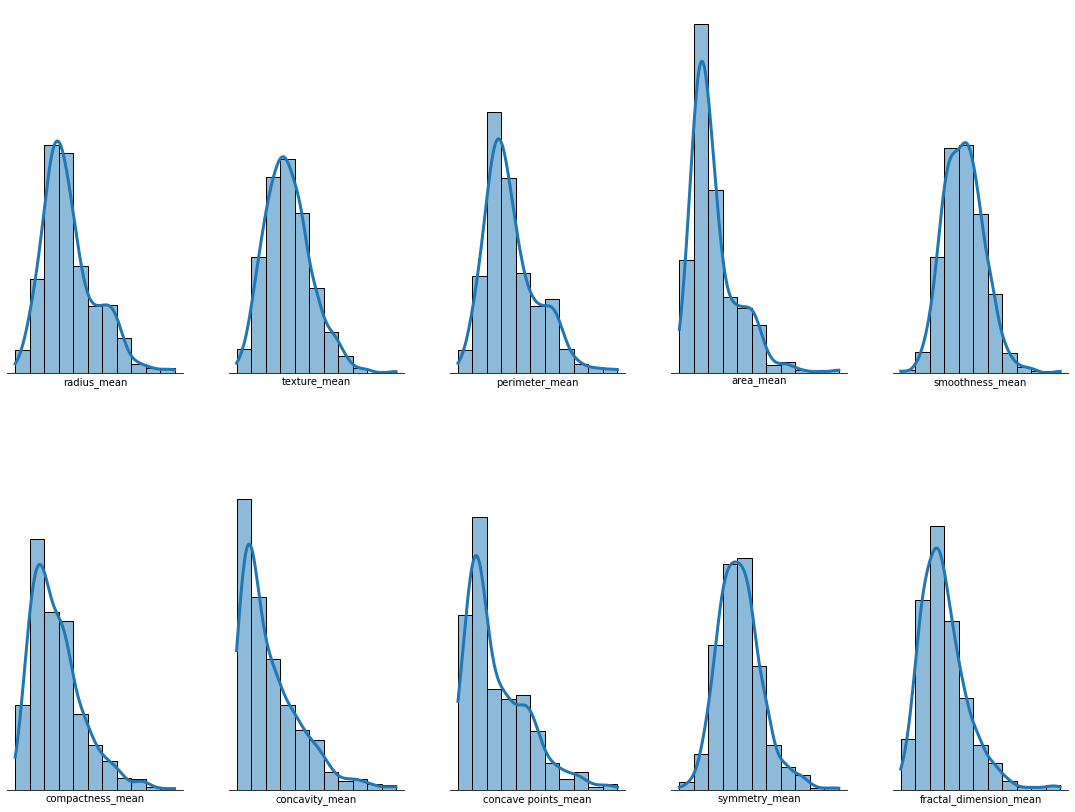

In [24]:
# plot the histograms
subplot_generator(df=df_mean, plot='histogram')

Amongst the "mean" variables, *texture_mean*, *simmetry_mean* and *smoothness_mean* show a quasi-normal distribution whereas all of the others are positively skewed distributed.

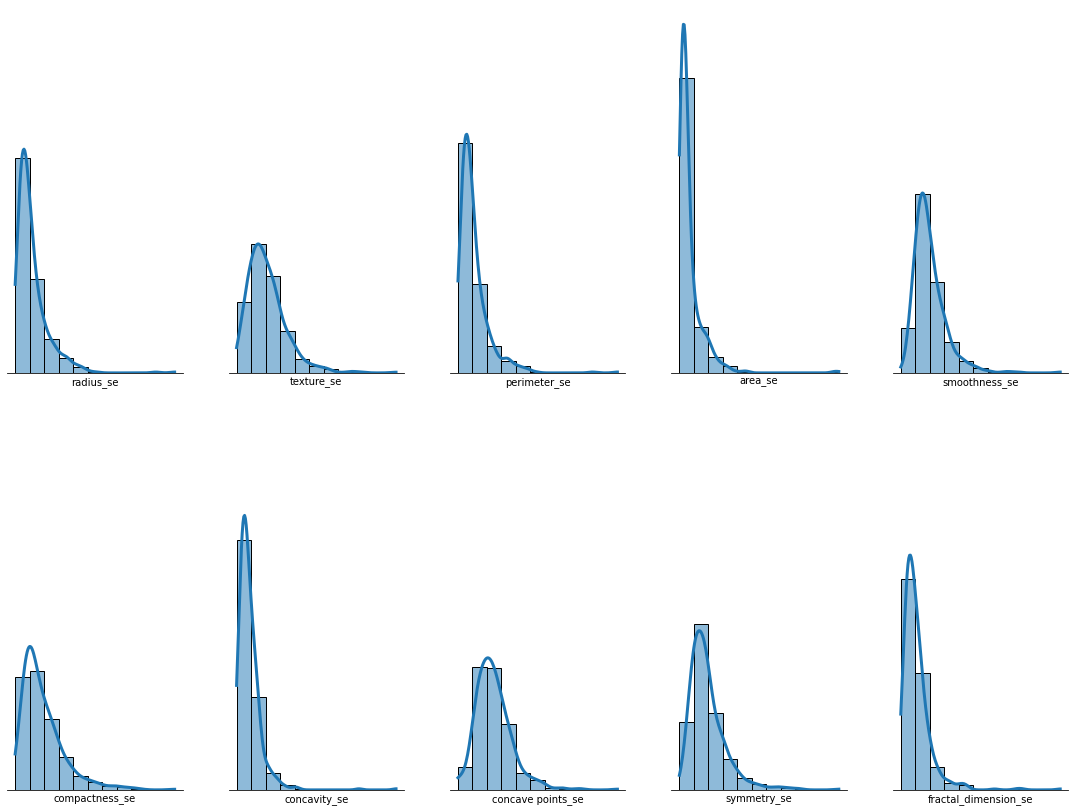

In [25]:
# plot the histograms
subplot_generator(df=df_se, plot='histogram')

All the "standard error" features follow a markedly positively skewed distribution.

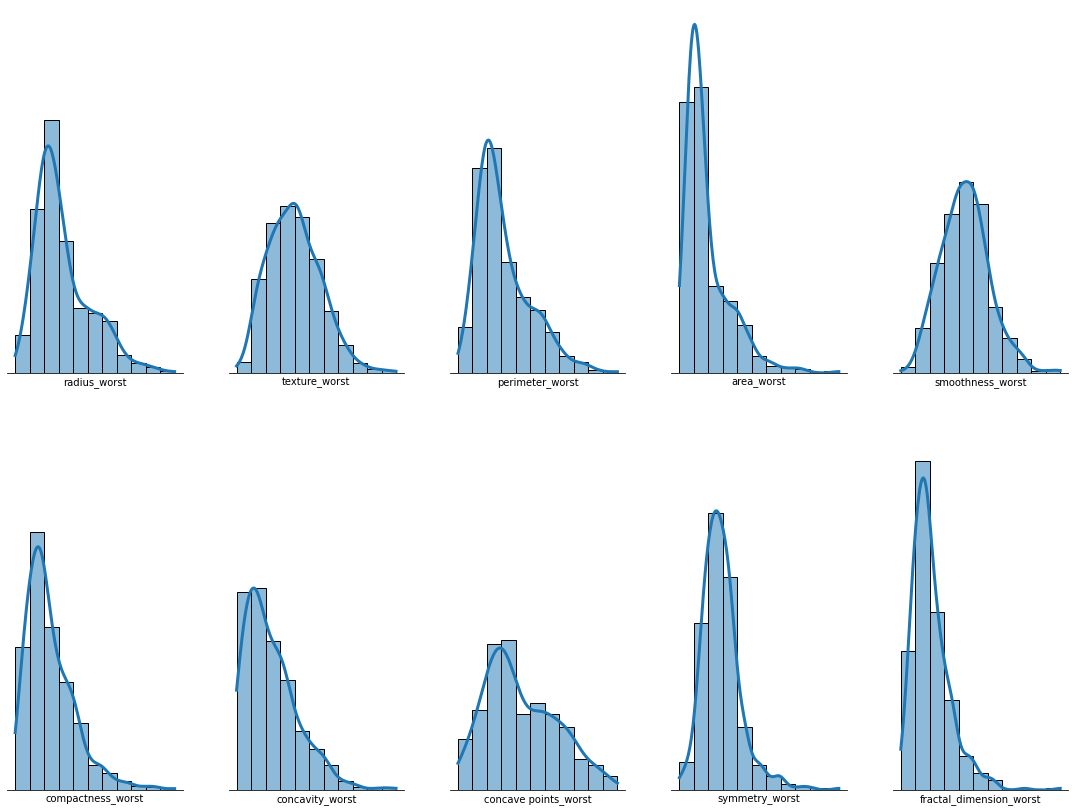

In [26]:
# plot the histograms
subplot_generator(df=df_worst, plot='histogram')

Also for the "worst" subset, the majority of variables present a markedly positively skewed distribution, except for *texture_worst* and *smoothness_worst*.

Finally, some features might suffer from the presence of *outliers*. It appears particularly in the "standard error" features, where the distribution tail of several features is rather long. 

This aspect will be analyzed in further depth in the corresponding section.

##### Violin Plot

Similarly to a box plot, a violin plot shows the distribution of quantitative data across several categories of one categorical variables. 

However, unlike the box plot, the violin plot features a kernel density estimation of the underlying distribution, which will enable to visualize each target class distribution with respect to our features.

This can be used as heuristic to speculate about how well a feature can help the classifier separating the malignant from the bening cancers, based on how different the two distributions are.

Finally, to eliminate the clutter, the plot has been stripped of the axes and legends, so bear in mind the coloring:
+ <span style="color:blue">Malignant</span>;
+ <span style="color:orange">Benign</span>.

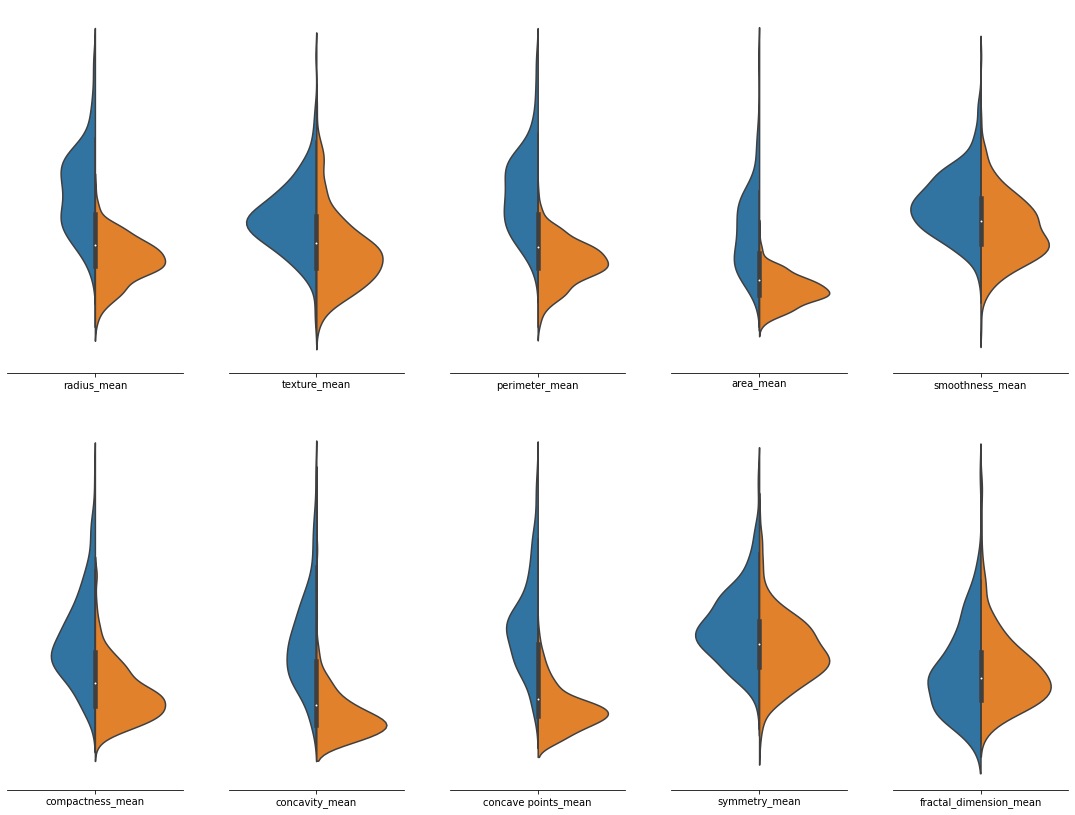

In [31]:
# plot the violinplots
subplot_generator(df=df_mean, y=y, plot='violinplot')

Let's try to interpret the above graph to provide an idea of the concept presented above.

For example, in *area_mean* variable, malignant and benign cancers are starkly different so it can be speculated that *area_mean* could help the classifier separate the two classes.

On the other hand, in some features such as *simmetry_mean* and *fractal_dimension_mean*, the two distributions exhibit a mirror-like distribution, thereby reducing the expected "discriminatory" power of these variables.

Now that the idea behind the plot has been grasped, the output of the remaining two subsets of features will not be commented. 

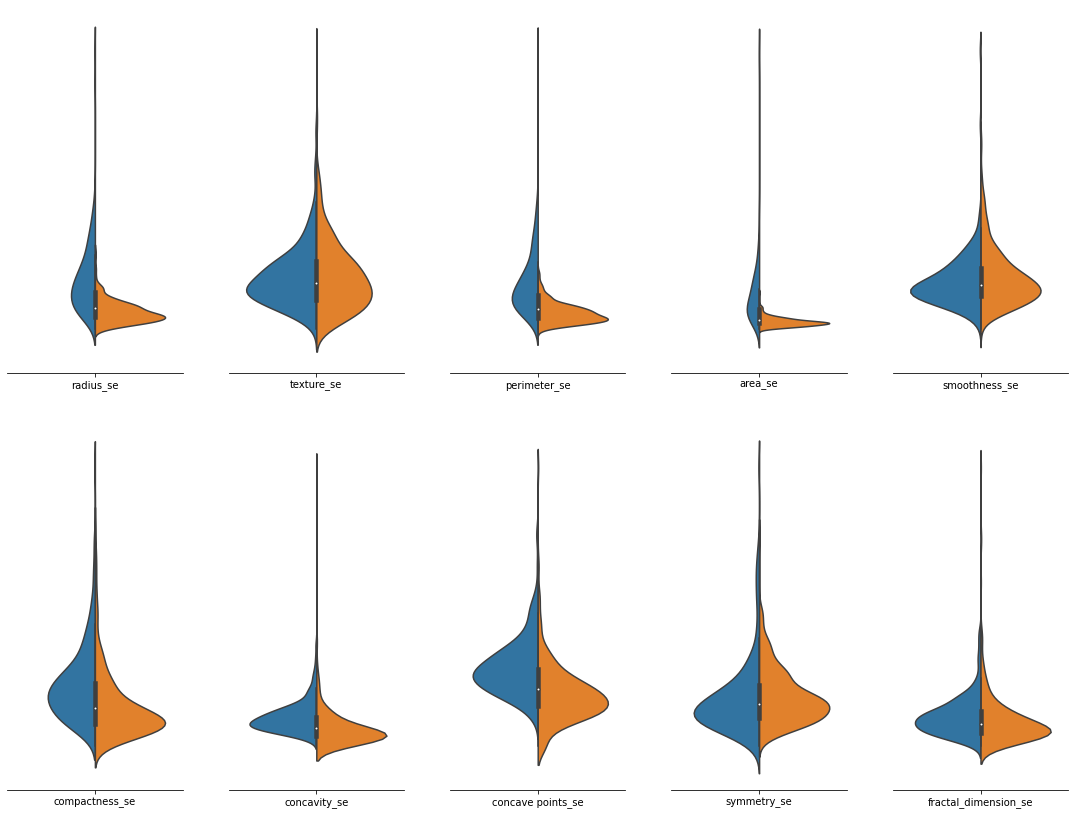

In [30]:
# plot the violinplots
subplot_generator(df=df_se, y=y, plot='violinplot')

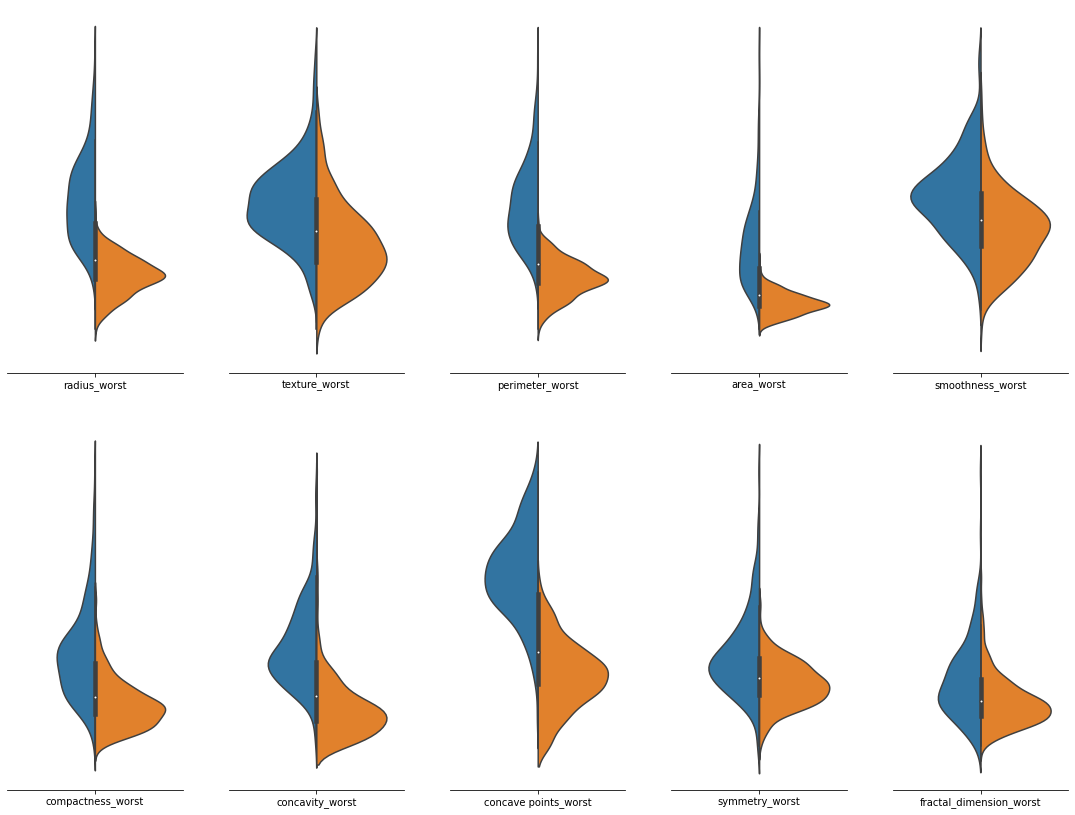

In [32]:
# plot the violinplots
subplot_generator(df=df_worst, y=y, plot='violinplot')

##### Swarm Plot

A swarm plot is a good complement to a violin plot since the former shows all observations while the latter a representation of the underlying distribution.

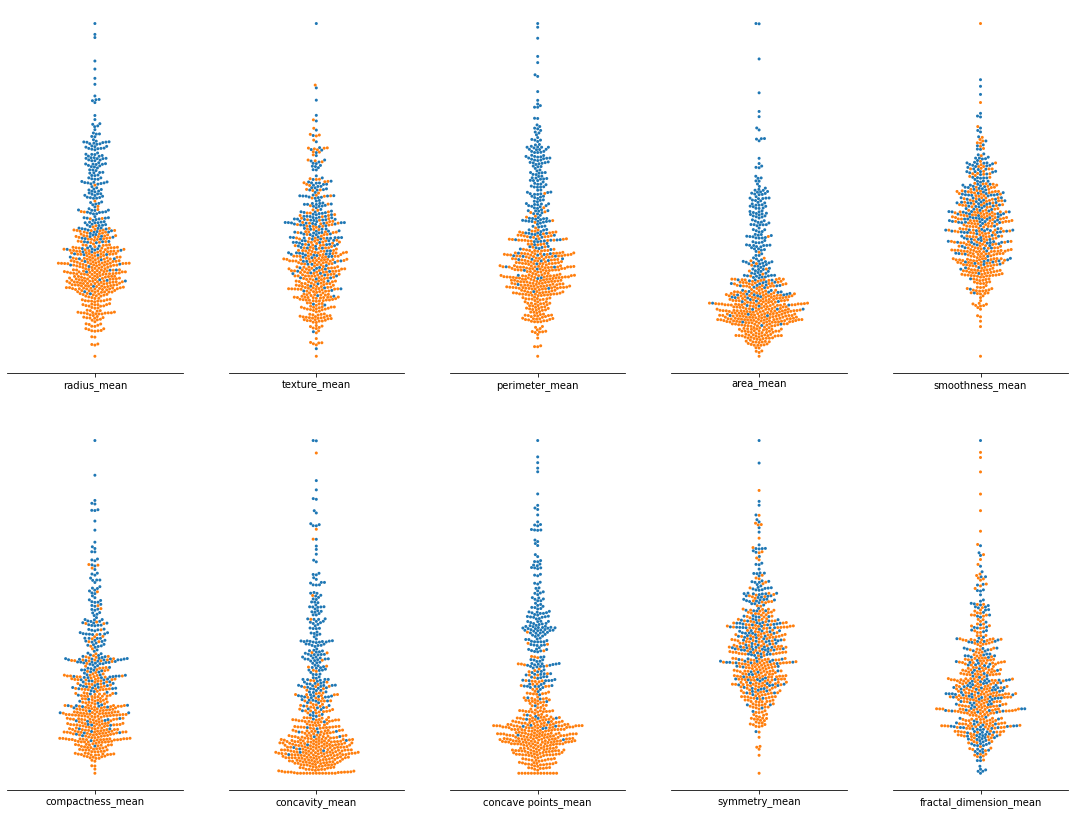

In [33]:
# plot the swarmplots
subplot_generator(df=df_mean, y=y, plot='swarmplot')

Drawing upon the variables that we mentioned for the violin plots, the swarmplot confirms our thoughts. 

We can easily notice how the dots of both classes are almost perfectly separated in *area_mean*. On the contrary, the two cancer types are completely blended in *simmetry_mean* and *fractal_dimension_mean*.



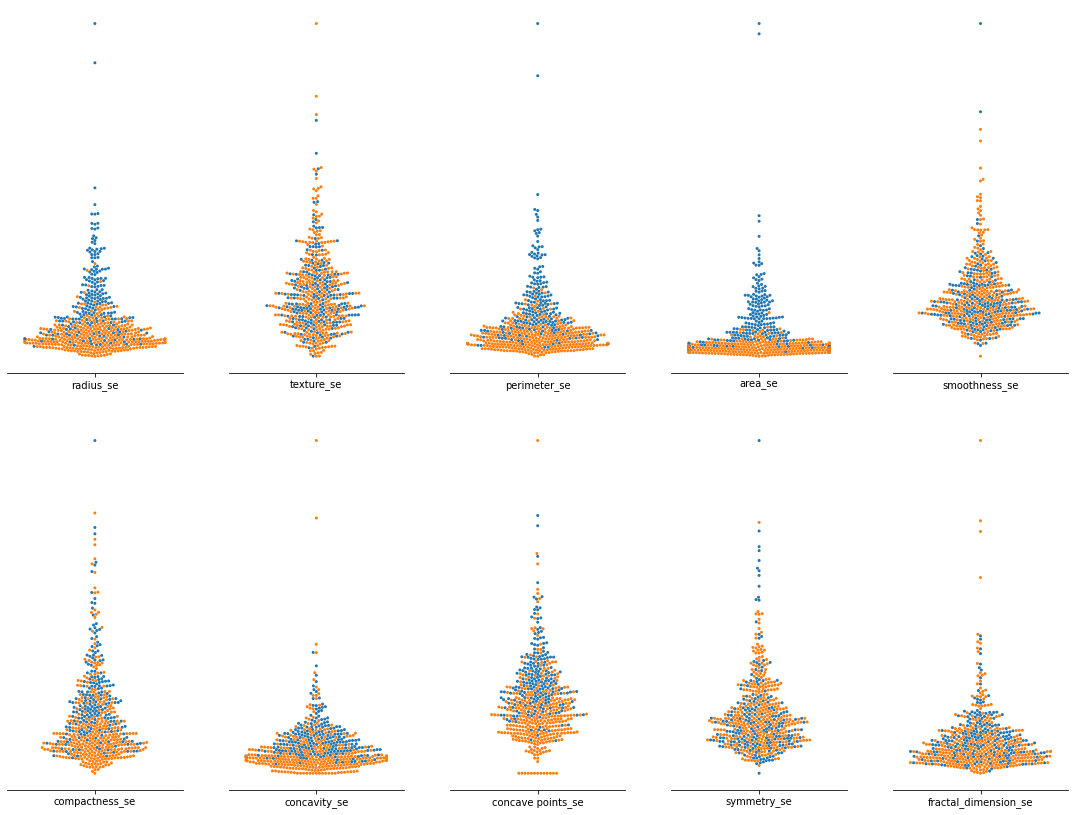

In [34]:
# plot the swarmplots
subplot_generator(df=df_se, y=y, plot='swarmplot')

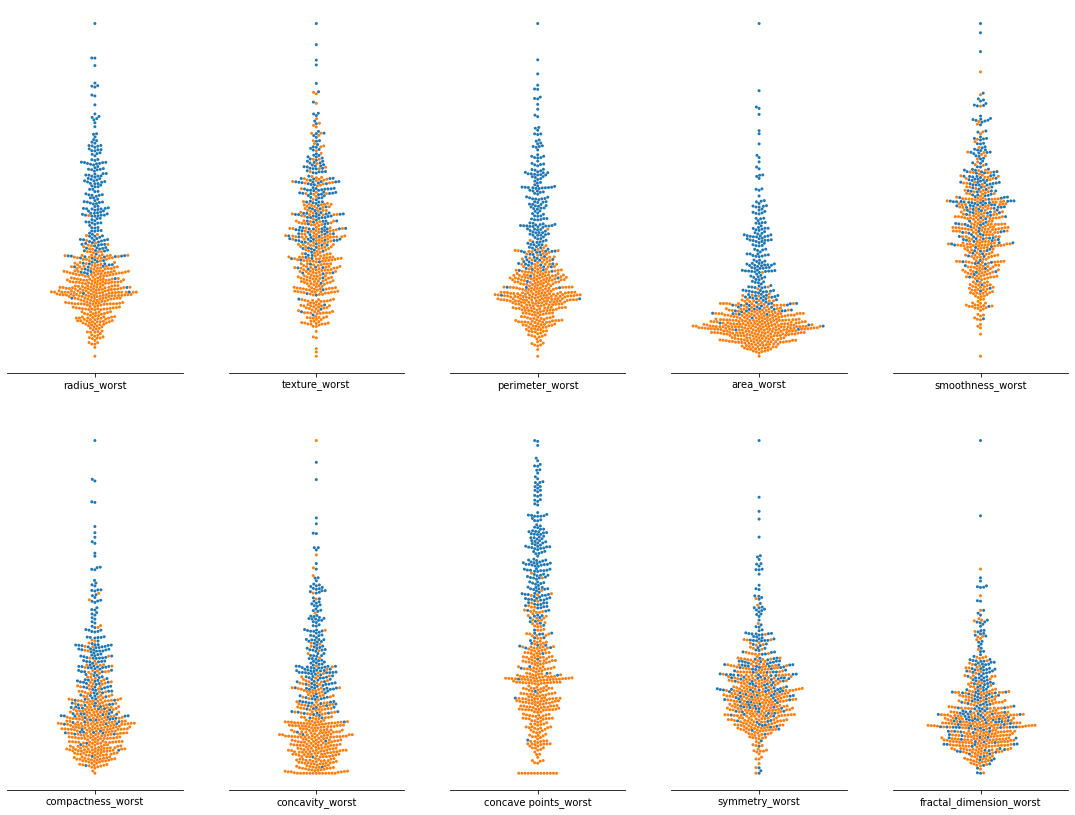

In [35]:
# plot the swarmplots
subplot_generator(df=df_worst, y=y, plot='swarmplot')

### Outliers

The visualization of the data distribution has already shown the probable presence of outliers. The boxplot is a very effective visualization tool to detect outliers via the concept of Interquartile range (IQR) technique.  

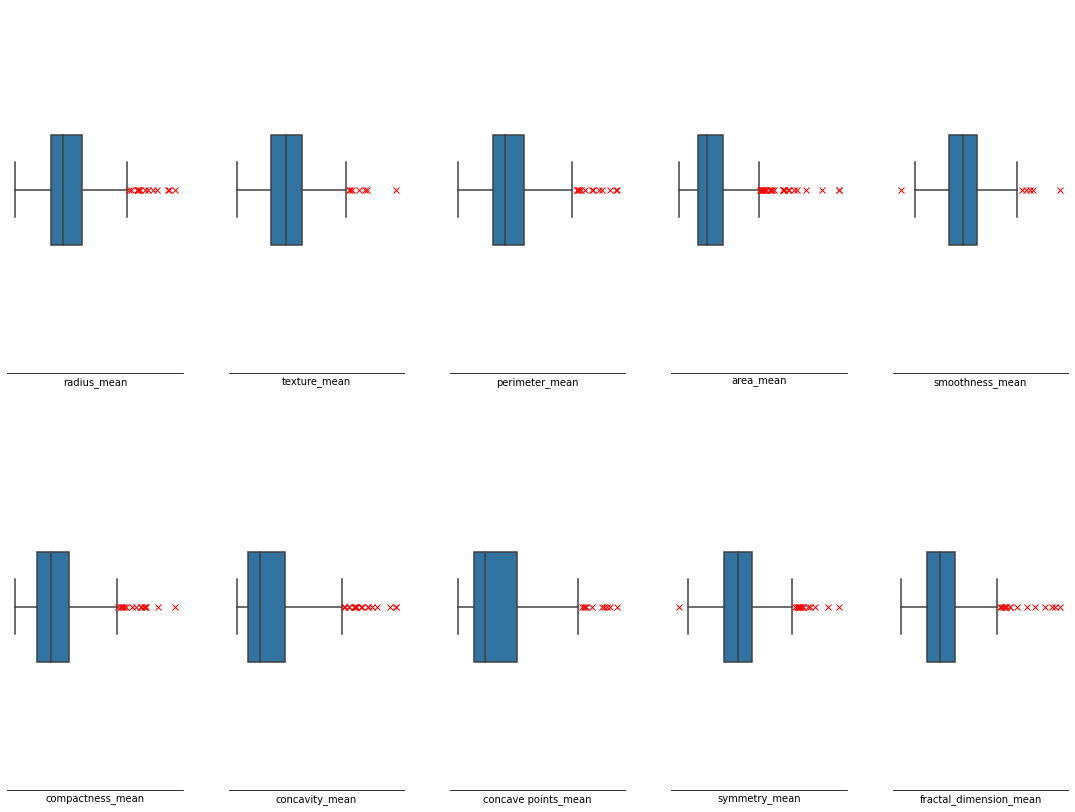

In [140]:
# plot the boxplot
subplot_generator(df=df_mean, plot='boxplot')

There are no observation that clearly stand out as outliers. Perhaps *texture_mean* and *smoothness_mean* feature one observation each that appears to be detached from the rest.  

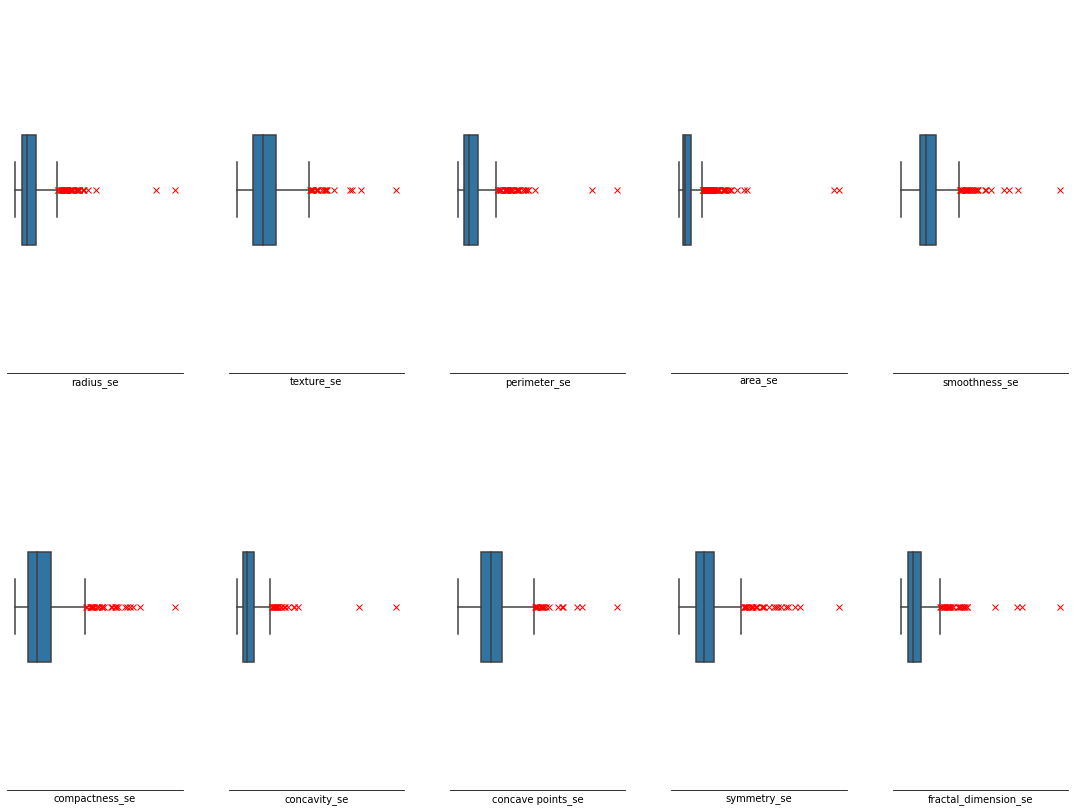

In [139]:
# plot the boxplot
subplot_generator(df=df_se, plot='boxplot')

On the other hand, this set of features appears to be outlier-ridden. Just to mention one example, *concavity_se* exhibits two samples largely far from the rest of the other observations.  

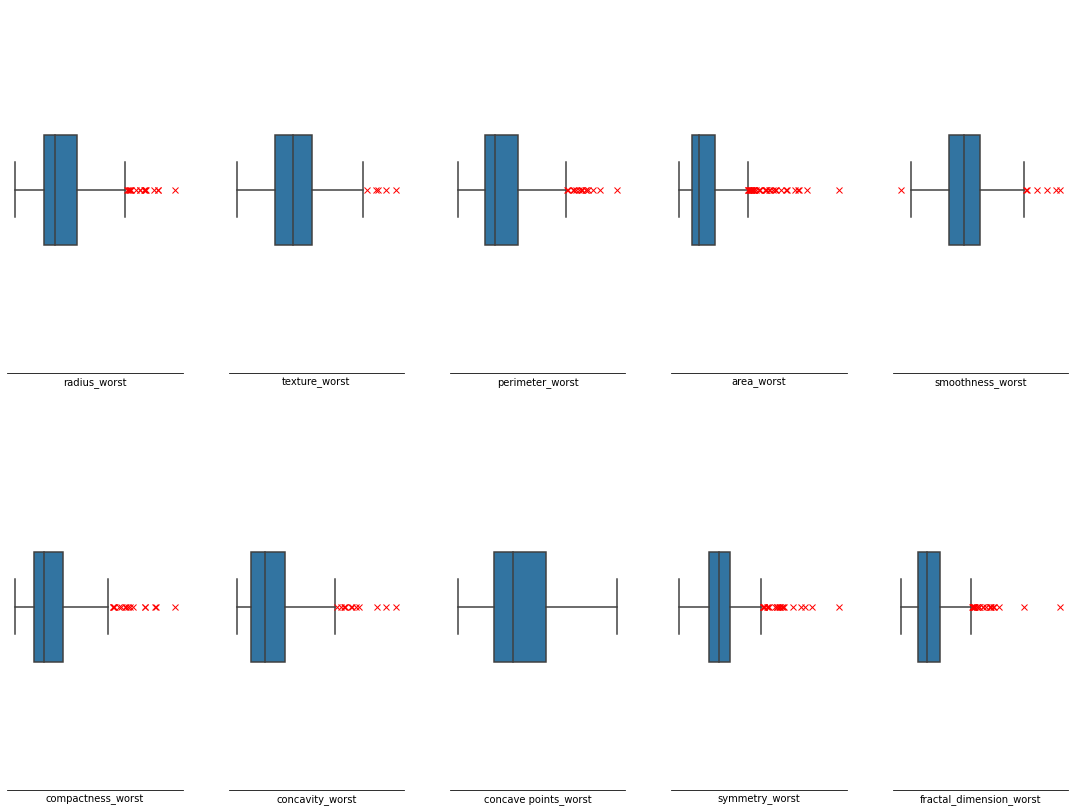

In [141]:
# plot the boxplot
subplot_generator(df=df_worst, plot='boxplot')

FInally, this set of features appears to be outlier-ridden. Just to mention one example, *concavity_se* exhibits two samples largely far from the rest of the other observations.  

Visualization is one of easiest ways to have an understanding about the overall data and the outliers in a *single* feature space. These visual tools can be aided by more advanced methods, enabling the outlier identification in a high-dimensional input feature space.

Amongst the many techniques available, we will implement the *Local Outlier Factor (LOF)*. In a nutshell, LOF aims at locating those observations that are far from the others in the feature space. Each is assigned a scoring of how isolated it is based on the density of its local neighborhood. Samples that have a substantially lower density than their neighbors are then more likely to be outliers (for a neat and visual explanation check this <a href=https://towardsdatascience.com/local-outlier-factor-for-anomaly-detection-cc0c770d2ebe>post</a> on TowardsDataScience).




In [4]:
from sklearn.neighbors import LocalOutlierFactor

# find the outliers
y_pred = LocalOutlierFactor().fit_predict(df.drop(["diagnosis"], axis=1))

outlier_count = abs(sum(y_pred[y_pred < 1]))

print(f'The vanilla Local Outlier Factor identified {outlier_count} outliers ({round(outlier_count/len(df), 2)}%)' )

The vanilla Local Outlier Factor identified 29 outliers (0.05%)


The vanilla implementation of LOF has discovered 29 outlier observations. No actions will be taken as of now.

The reason is that there is no precise way to define and identify outliers in general because of the specifics of each dataset. Instead, with domain expertise, these observations must be interepreted to figure whether a value is an outlier or not. 

In fact it is *not* implicit that values identified as outliers are actually so, and therefore should be removed.





### Correlation

To conclude with this first round of data exploration, we will analyze the correlation between features in our dataset. This is important for several reasons:

+ the features that would contribute most to the quality of the resulting model can be discovered, part of what is called *Feature Selection*;

+ the presence of (almost) perfectly correlated indipendent variables might lead to estimation problems, due to the so-called *Multicollinearity* (e.g. Linear and Logistic Regressions).

Before we move on, a final consideration. In light of what we have discovered during the analysis of our feature distributions, we should discard the hypothesis of using *Pearson's* correlation due to its underlying assumption of normality of both variables. On the other hand, *Spearman's rank* correlation can be used when the normality assumption is markedly violated.

In [5]:
# encoding the target variable  
df['diagnosis'] = df['diagnosis'].map({'B' : 0, 'M' : 1})

# convert it into a numeric variable
df['diagnosis'] = pd.to_numeric(df['diagnosis'])

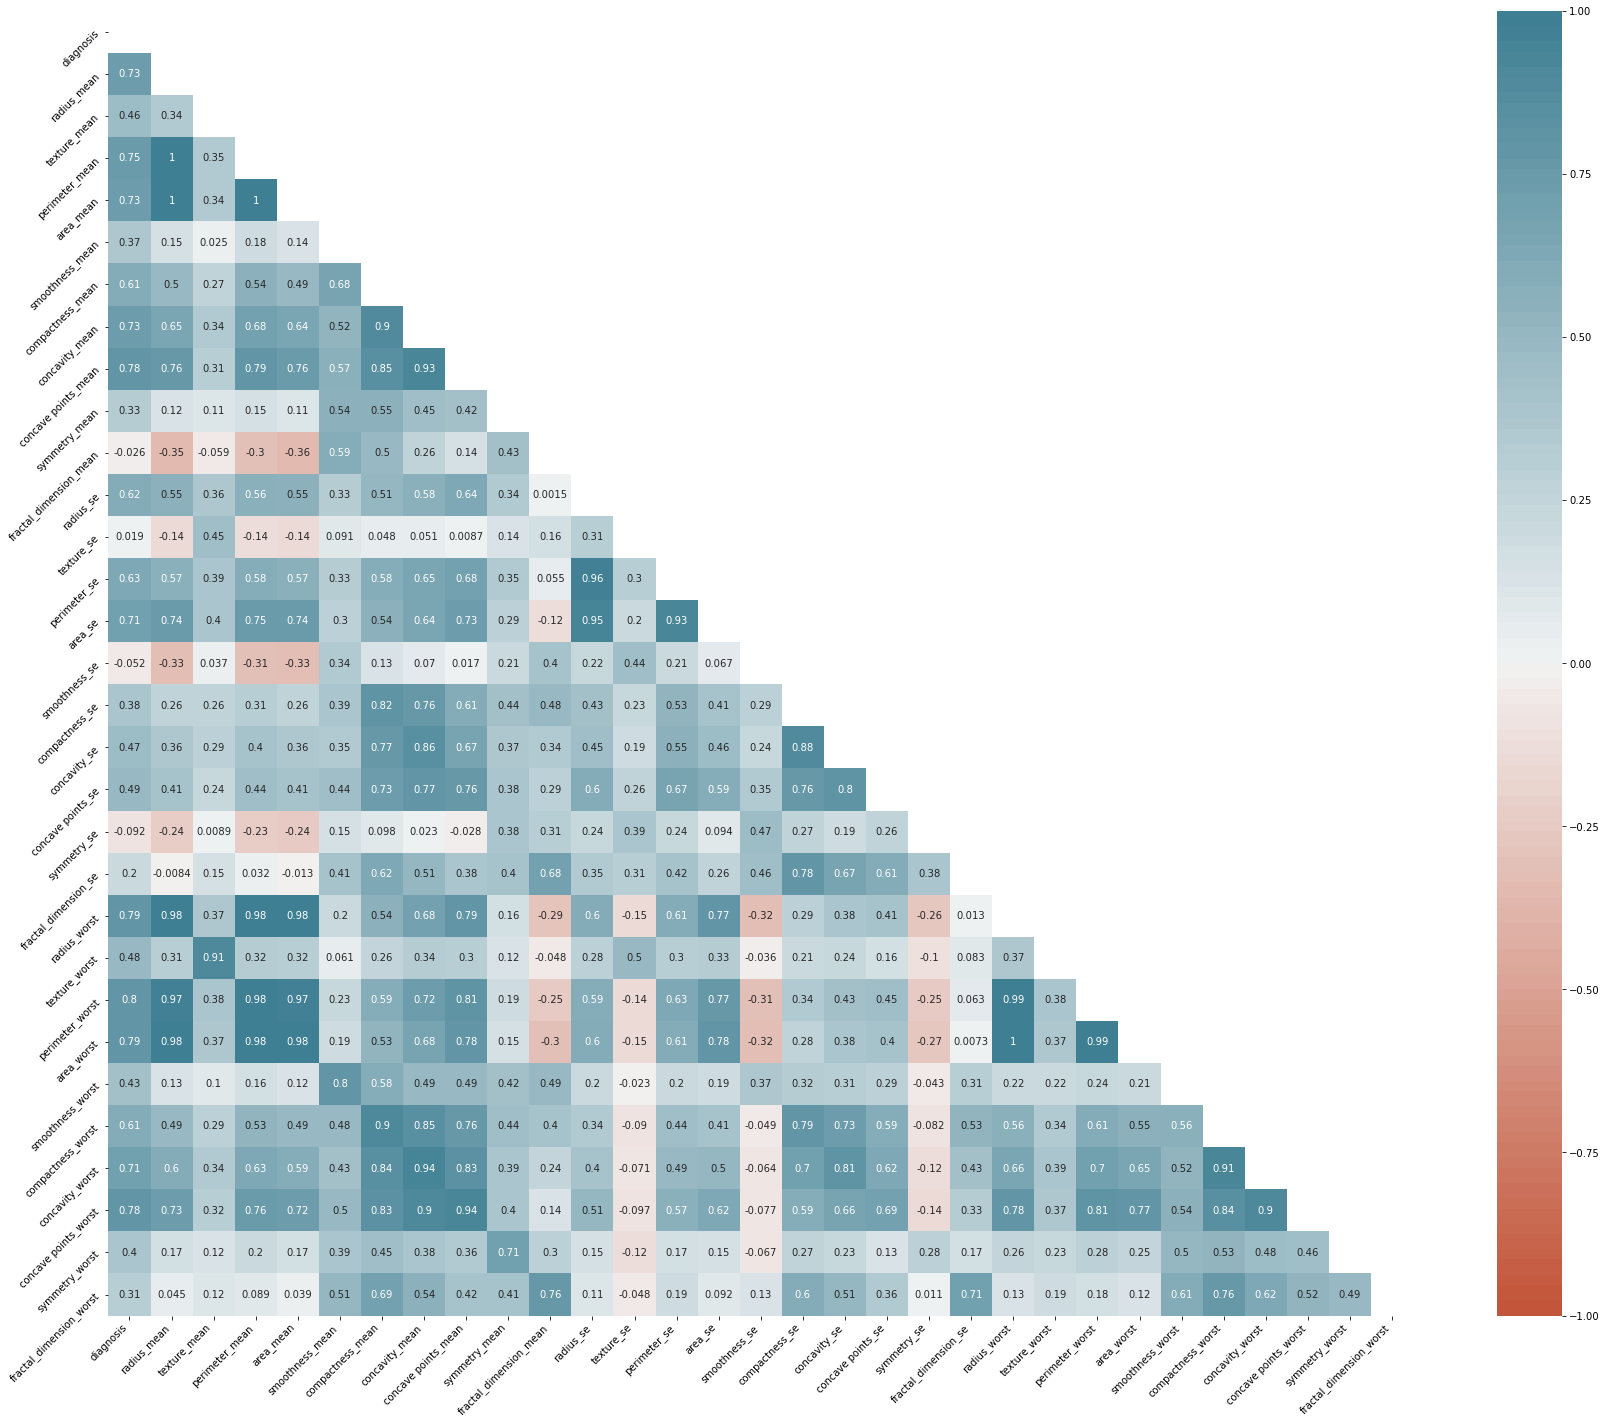

In [51]:
plt.figure(figsize=(30, 24))

# create the correlation matrix
corr_mat = df.corr(method='spearman')

# remove the upper diagonal
mask = np.zeros(corr_mat.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True

# set the plot dimension
fig = plt.figure(1, figsize=(14, 10))

ax = sns.heatmap(corr_mat, vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(20, 220, n=100),
                 square=True, annot=True, mask=mask)

# modify the X and Y labels appearence
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# plot the graph
plt.show()

Let's begin by first considering features presenting a *Strong* correlation with our target column (<a href=https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6107969/>source</a>):

In [52]:
high_corr_feat_list = list(corr_mat[(abs(corr_mat['diagnosis']) >= 0.7) & (corr_mat.columns != 'diagnosis')].index)
high_corr_feat_list

['radius_mean',
 'perimeter_mean',
 'area_mean',
 'concavity_mean',
 'concave points_mean',
 'area_se',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'concavity_worst',
 'concave points_worst']

Second, we can now investigate which features will possibly contribute to the issue of multicollinearity. Given that many variables are at least strongly correlated, we will focus only on those showing a correlation from *Very Strong* to *Perfect*.

|                     |        Feature 1       |     Feature 2     |        Feature 3        |      Feature 4     |     Feature 5    |
|---------------------|:----------------------:|:-----------------:|:-----------------------:|:------------------:|:----------------:|
| *radius_mean*       | *area_worst*           | *perimeter_worst* | *radius_worst*          | *area_mean*        | *perimeter_mean* |
| *concavity_mean*    | *concave_points_worst* | *concavity_worst* | *concavity_points_mean* | *compactness_mean* |                  |
| *radius_se*         | *perimeter_se*         | *area_se*         |                         |                    |                  |
| *compactness_mean*  | *compactness_worst*    |                   |                         |                    |                  |
| *compactness_worst* | *concavity_worst*      |                   |                         |                    |                  |
| *texture_mean*      | *texture_worst*        |                   |                         |                    |                  |

At this stage, we are ready to move the modelling part. And in this phase, we will consider whether this knowledge could be employed to improve our model results.

## Model Selection

In [6]:
from utils.model_selection import nested_cv

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from skopt.sampler import Grid

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn import FunctionSampler

The following algorithms will be evaluated:
+ k-Nearest Neighbors;
+ Logistic Regression;
+ Naive Bayes;
+ Random Forest;
+ Support Vector Machine.

Given the relative scarcity of data, we will evaluate the above ML models using *nested k-fold cross-validation* (nested CV). Nested CV implements a series of train/validation/test set splits. In the inner loop, the metric score is approximately maximized by fitting a model to each training set, and then directly maximized in selecting hyperparameters over the validation set. 
Then, the model with the best score will be refit on the whole training set, and eventually tested on the test set in the outer loop.
The generalization error of this nested CV will simply be estimated by averaging test set scores over the different dataset splits.

In short, the idea of nested CV is that we are left with a *process* rather than a model and a parameter set. The hyperparameter search will pick them for us, whatever is "best" according to the data and metric at hand.

In [7]:
# set the inner and outer CV
cv_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
cv_inner = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

In fact, another relevant aspect to decide upon during model selection regards hyperparameter optimization. We will opt for a Bayesian approach. 

At a high-level, Bayesian optimization methods are efficient because they choose the next hyperparameters in an informed manner (detailed explanation <a href=https://towardsdatascience.com/a-conceptual-explanation-of-bayesian-model-based-hyperparameter-optimization-for-machine-learning-b8172278050f>here</a>). By evaluating hyperparameters that appear more promising from past results, these methods choose only the relevant search space and discards the ranges that will most likely not deliver the best solution. The benefit is the identification of a better hyperparameter combination in fewer iterations than "traditional" approaches.




We will use the `skopt` library, and some parameters are worth being mentioned. They are all interconnected:

+ `n_iter`: the total number of points that will be sampled - this figure comprehends both exploration and explotation;
+ `n_initial_points`: the number of points dedicated to the initial purely explorative part;
+ `initial_point_generator`: the sampling method that generate such explorative points.

We will change the parameter `initial_point_generator` from random to *grid* sampling (visual comparison <a href=https://scikit-optimize.github.io/stable/auto_examples/sampler/initial-sampling-method.html#sphx-glr-auto-examples-sampler-initial-sampling-method-py>here</a>). Moving away from random sampling enables us to leverage a better spread of the initial points.

Given the demonstrative purpose of this notebook, the other two settings will not be modified. Yet, bear in mind that their alteration trades off runtime versus quality of the solution.

In [9]:
# set the dict with params to
# be passed onto the optimizer
optimizer_dict = {
        'n_initial_points' : 10,
        'initial_point_generator' : Grid(border="include")
        }

### Data Preprocessing

To perform the data preprocessing, we will leverage the concept of *pipelines*. This is important for two main reasons:

+ Avoid data leakage;
+ Consistency and reproducibility.

We will use `imblearn`. Built on top of `sklearn`, contains an estimator that allows manipulating *both* the features array, X, and target array, y, in a pipeline step.
Its greatest merit is that it can be employed easily within a pipeline in which the number of samples can vary during training, which is long-standing limitation of the current `sklearn` pipeline (<a href=https://github.com/scikit-learn/scikit-learn/issues/4143>source</a>).

In [10]:
# split the columns into features and targets
X = df[df.columns.drop(['diagnosis'])]
y = df['diagnosis']

### Baseline Model

First, we will start with a basic implementation of the chosen models. The obtained *recall* score will become our baseline. 

After, we will try to tackle the several hindrances the EDA has presented us with, and assess whether their resolution has improved our model performance:

+ imbalanced dataset;
+ widely different feature ranges;
+ presence of outliers;
+ (almost) perfectly correlated features.

In [11]:
# create the pipeline
pipeline = Pipeline([
    ('clf', None)
])

In [12]:
# set the parameter search space for classifier 1
gnb_search = {
    'clf': Categorical([GaussianNB()]),
    'clf__var_smoothing': Real(1e-9, 2)
}

# set the parameter search space for classifier 2
svc_search = {
    'clf': Categorical([SVC()]),
    'clf__C': Real(1e-6, 1e+6, prior='log-uniform'),
    'clf__gamma': Real(1e-6, 1e+1, prior='log-uniform'),
    'clf__degree': Integer(1, 3),
    'clf__kernel': Categorical(['linear', 'poly', 'rbf'])
}

# set the parameter search space for classifier 3
log_search = {
    'clf': Categorical([LogisticRegression()]),
    'clf__C': Real(1e-5, 10),
    'clf__penalty': Categorical(['l2']),
    'clf__class_weight': Categorical([None, 'balanced']),
    'clf__solver': Categorical(['lbfgs', 'liblinear']),
    'clf__max_iter': [1000]
}

# set the parameter search space for classifier 4
rf_search = {
    'clf': Categorical([RandomForestClassifier()]),
    'clf__n_estimators': Integer(10, 200),
    'clf__criterion': Categorical(['gini', 'entropy']),
    'clf__min_samples_split': Integer(2, 200),
    'clf__min_samples_leaf': Integer(1, 200),
    'clf__min_impurity_decrease': Real(0, 1),
    'clf__max_features': Integer(1, 15)
}

# set the parameter search space for classifier 1
knn_search = {
    'clf': Categorical([KNeighborsClassifier()]),
    'clf__n_neighbors': Integer(2, 20, prior='log-uniform'),
    'clf__weights': Categorical(['uniform', 'distance']),
    'clf__leaf_size': Integer(30, 100),
    'clf__p': Integer(1, 2),
    'clf__algorithm': Categorical(['ball_tree', 'kd_tree', 'brute'])
}

In [13]:
# create a list of models
model_list = [
    gnb_search,
    svc_search,
    log_search,
    rf_search,
    knn_search
]

In [14]:
# set the number of searches to perform
search_num = 10

# create the search space by joining
# all of the classifiers that need to be optimized
search_space_list = [
    (log_search, search_num), 
    (svc_search, search_num), 
    (rf_search, search_num),
    (gnb_search, search_num),
    (knn_search, search_num)
]

In [15]:
# define the Bayesian search
opt_search = BayesSearchCV(
    estimator=pipeline,
    search_spaces=search_space_list,
    optimizer_kwargs=optimizer_dict,
    scoring='recall',
    cv=cv_inner,
    refit=True,
    return_train_score=True,
    random_state=42)

In [46]:
%%time
# enumerate splits
nested_cv(X, y, cv_outer, opt_search, True)

Fold 1
Recall | Validation: 0.963	Test: 0.864


Best Hyperparameter Combination:
OrderedDict([('clf', LogisticRegression(C=10.0, class_weight='balanced', max_iter=1000)), ('clf__C', 10.0), ('clf__class_weight', 'balanced'), ('clf__max_iter', 1000), ('clf__penalty', 'l2'), ('clf__solver', 'lbfgs')])


Fold 2
Recall | Validation: 0.947	Test: 0.955


Best Hyperparameter Combination:
OrderedDict([('clf', SVC(C=1000000.0, degree=1, gamma=0.0031622776601683794, kernel='poly')), ('clf__C', 1000000.0), ('clf__degree', 1), ('clf__gamma', 0.0031622776601683794), ('clf__kernel', 'poly')])


Fold 3
Recall | Validation: 0.948	Test: 1.0


Best Hyperparameter Combination:
OrderedDict([('clf', LogisticRegression(C=10.0, class_weight='balanced', max_iter=1000)), ('clf__C', 10.0), ('clf__class_weight', 'balanced'), ('clf__max_iter', 1000), ('clf__penalty', 'l2'), ('clf__solver', 'lbfgs')])


Fold 4
Recall | Validation: 0.938	Test: 0.952


Best Hyperparameter Combination:
OrderedDict([('clf', LogisticReg

The nested CV ran for almost 56 minutes, achieving a 94% recall. This will represent the baseline to beat. 

Further, notice how, depending on the fold:

+ the best model might differ;
+ the test recall could vary widely (cfr. the standard deviation). 

This is to stress that CV in general is *not* a method to get one or multiple trained models for inference, but only a tool to estimate an unbiased generalization performance.

### Baseline Model + Scaling

Let's now scale our features.

In [31]:
# create the pipeline with the scaler
pipeline = Pipeline([
    ('scaler', MinMaxScaler()), 
    ('clf', None)
])

In [32]:
# define the Bayesian search
opt_search = BayesSearchCV(
    estimator=pipeline,
    search_spaces=search_space_list,
    optimizer_kwargs=optimizer_dict,
    scoring='recall',
    cv=cv_inner,
    refit=True,
    return_train_score=True,
    random_state=42)

In [33]:
%%time
# enumerate splits
nested_cv(X, y, cv_outer, opt_search, False)

Recall | Validation Mean: 0.967, Validation Std: 0.004
Recall | Test Mean: 0.958, Test Std: 0.04
Wall time: 3min 20s


Scaling the data has improved both the validation and test perfomances by almost 2% points. And more interestingly, it has slashed the training time from 56 to about 3.5 minutes! This is because normalization also enables the gradient descent algorithm for the Logistic Regressor to find the minimum faster (check this <a href=https://stats.stackexchange.com/questions/322822/how-normalizing-helps-to-increase-the-speed-of-the-learning/507318>post</a> for a clear visualization).

### Baseline Model + Scaling + Outlier Detection

Let's now try to tackle the presence of outliers. Recall how we did not not take any actions when we identified 26 outliers overall, since domain knowledge is necessary. In light of this - and for the demonstrative nature of this notebook - we will still implement an outlier removal transformer in our pipeline, yet, with a conservative approach. In fact, only observations scoring a negative outlier factor above the 1st percentile will be dropped.

<div class="alert alert-block alert-danger"> In other words, please deem such a "blind" application of the below Local Outlier Factor technique only an exhibiton. </div>


In [16]:
def lof(X, y):
    """Find the outliers above the 1st percentile and remove them from both X and y."""
    model = LocalOutlierFactor()
    model.fit(X)
    # extract 
    lof_score = model.negative_outlier_factor_
    # find the 1st percentile
    percentile = np.quantile(lof_score, 0.01)

    return X[lof_score > percentile, :], y[lof_score > percentile]

In [17]:
# create the pipeline
pipeline = Pipeline([
    ('outlier_detector', FunctionSampler(func=lof)),
    ('scaler', MinMaxScaler()), 
    ('clf', None)
])

In [18]:
# define the Bayesian search
opt_search = BayesSearchCV(
    estimator=pipeline,
    search_spaces=search_space_list,
    optimizer_kwargs=optimizer_dict,
    scoring='recall',
    cv=cv_inner,
    refit=True,
    return_train_score=True,
    random_state=42)

In [19]:
%%time
# enumerate splits
nested_cv(X, y, cv_outer, opt_search, False)

Recall | Validation Mean: 0.969, Validation Std: 0.006
Recall | Test Mean: 0.957, Test Std: 0.05
Wall time: 3min 56s


The model has not improved. Thus based on the *Occam's razor*, we will remove the outlier removal function from the model, since all else equal, we favor a simpler model.

### Baseline Model + Scaling + SMOTE

We will now try to handle the disparity between the two classes thorugh a common technique, called *SMOTE*. SMOTE does not duplicate samples from the minority class, but actually synthesizes new samples that are relatively close in feature space to existing ones (detailed explanation <a href=https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/>here</a>).

In [20]:
# create the pipeline
pipeline = Pipeline([
    ('smote', SMOTE(sampling_strategy='minority', random_state=42)),
    ('scaler', MinMaxScaler()), 
    ('clf', None)
])

# add SMOTE parameters
for d in model_list:
    d['smote__k_neighbors'] = Integer(2, 15)

In [21]:
# define the Bayesian search
opt_search = BayesSearchCV(
    estimator=pipeline,
    search_spaces=search_space_list,
    optimizer_kwargs=optimizer_dict,
    scoring='recall',
    cv=cv_inner,
    refit=True,
    return_train_score=True,
    random_state=42)

In [ ]:
%%time
# enumerate splits
nested_cv(X, y, cv_outer, opt_search, False)

Recall | Validation Mean: 1.0, Validation Std: 0.0
Recall | Test Mean: 1.0, Test Std: 0.0
Wall time: 6min 34s


Great! *Recall* has now reached 100%. This should not surprise as SMOTE generally entails an increase in recall, at the cost of lower precision.

## Conclusions

Things to try out:

+ different values for skopt
+ different methods for outlier selection, as well as different distances than Euclidean
+ RFECV
+ different point generator